<a href="https://colab.research.google.com/github/eser1303/Vizualization_2/blob/main/Vizualization_EF_CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#!pip install wget
#import wget
import matplotlib.pyplot as plt
import networkx as nx
import array

In [132]:
%cd /content/
!ls 
!rm -r tree_exmp/
!git clone https://github.com/eser1303/Vizualization_2 tree_exmp
%cd tree_exmp/

/content
sample_data  tree-10n.xml  tree-13n.xml
rm: cannot remove 'tree_exmp/': No such file or directory
Cloning into 'tree_exmp'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
/content/tree_exmp


In [133]:
def find_roots(G):
   roots = []
   nodes = list(G.nodes())
   for i in nodes:
      parent = list(G.predecessors(i))
      if len(parent) == 0:
         roots.append(i)
   return roots

def find_leaves(G):
   leaves = []
   nodes = list(G.nodes())
   for i in nodes:
      children = list(G.successors(i))
      if len(children) == 0:
         leaves.append(i)
   return leaves

def CG(G, active_nodes, used_nodes, node_num):
   new_layer = []
   parents_keys = {}
   for i in active_nodes:
      children = list(G.successors(i))
      for j in children:
         if (j not in active_nodes) and (j not in used_nodes):
            new_layer.append(j)
      parents = list(G.predecessors(i))
      tmp = []
      for j in parents: 
         tmp.append(node_num[j])
      if len(tmp) == 0:
         parents_keys[i] = sorted(tmp)
      elif min(tmp) != -1:
         parents_keys[i] = sorted(tmp)
      else:
         new_layer.append(i)
   
   sorted_keys = sorted(parents_keys, key = lambda k: (len(parents_keys[k]), parents_keys[k]))
   #print(sorted_keys)
   vals = []
   for i in range(len(sorted_keys)):
      vals.append(parents_keys[sorted_keys[i]])
      used_nodes.append(sorted_keys[i])
      node_num[sorted_keys[i]] = len(used_nodes)
   #print(vals)
   #print(parents)
   if len(new_layer) > 0:
      used_nodes, node_num = CG(G, new_layer, used_nodes, node_num)
   return used_nodes, node_num

def CG_W(G, node_num, active, used, w):
   k = 0
   last_k = -1
   L = []
   Lk = []
   vert_lev = {}
   #node_num = dict.fromkeys(list(G.nodes()), -1)
   node_q = len(list(G.nodes()))
   while len(used) < node_q:
     new_layer = []
     max_node = active[0]
     for i in active:
        children = list(G.successors(i))
        flag = 0
        for j in children:
           if j not in used:
              new_layer.append(i)
              flag = 1
        if flag == 0 and node_num[i] > node_num[max_node]:
           max_node = i
           parents = list(G.predecessors(i))
           for j in parents:
              new_layer.append(j)
     children = list(G.successors(max_node))
     max_k = -1
     for i in children:
        if vert_lev[i] > max_k:
          max_k = vert_lev[i] 
     k = max_k
     #print(max_node, k, last_k, L, vert_lev)
     while max_node not in used and k < last_k:
        k += 1
        if len(L[k]) < w:
           L[k].append(max_node)
           used.append(max_node)  
           vert_lev[max_node] = k   
     if max_node not in used:
        last_k += 1
        Lk = []
        Lk.append(max_node)
        L.append(Lk)
        used.append(max_node)
        vert_lev[max_node] = last_k
     for i in new_layer:
        if i not in active:
           active.append(i)
     active.remove(max_node)
   #L.reverse()
   return L

def map_to_posit(L, posit):
   for i in range(len(L)):
      for j in range(len(L[i])):
         posit[L[i][j]] = array.array('d', [j, i])
   return posit

In [138]:
filename = 'tree-13n.xml'
G = nx.DiGraph()
G = nx.read_graphml(filename)
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))

List of all nodes:  ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13']
List of all edges:  [('n1', 'n3', {}), ('n1', 'n4', {}), ('n3', 'n5', {}), ('n3', 'n6', {}), ('n3', 'n8', {}), ('n3', 'n9', {}), ('n4', 'n7', {}), ('n4', 'n8', {}), ('n4', 'n10', {}), ('n5', 'n11', {}), ('n7', 'n9', {}), ('n8', 'n10', {}), ('n9', 'n12', {}), ('n10', 'n12', {}), ('n10', 'n11', {}), ('n11', 'n13', {}), ('n12', 'n13', {})]


In [139]:
roots = find_roots(G)
used_nodes = []
node_num = dict.fromkeys(list(G.nodes()), -1)
order, node_num = CG(G, roots, used_nodes, node_num)
print(order)
print(node_num)

['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13']
{'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9, 'n10': 10, 'n11': 11, 'n12': 12, 'n13': 13}


In [140]:
w = 3
used = []
leaves = find_leaves(G)
L = CG_W(G, node_num, leaves, used, w)
for x in L: print(x)
posit = dict.fromkeys(list(G.nodes()))
posit = map_to_posit(L, posit)

['n13', 'n6', 'n2']
['n12', 'n11']
['n10', 'n9', 'n5']
['n8', 'n7']
['n4', 'n3']
['n1']


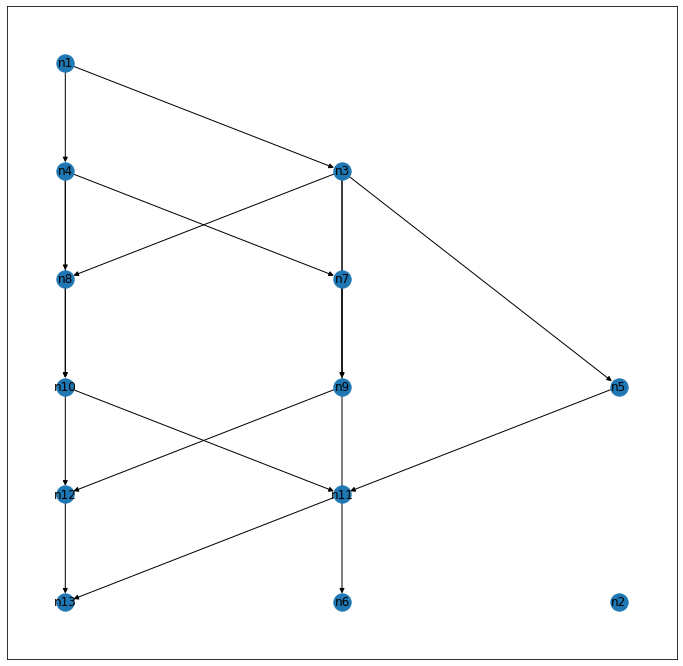

In [141]:
plt.figure(1,figsize=(12,12)) 
nx.draw_networkx(G,pos = posit)
plt.show()